<center> <font size="+4">**ML - Regression Project**</font></center>

<center><font size="+2">Project: Retail Sales Prediction

      Contribution: Individual

** Name: Chayan Patra**</font></center>

<center><font size="+2"><u><B> Summary </B></u></font></center>

<B>Predicting Rossmann Store Sales: A Regression Analysis</B>

In this notebook, we delve into the dynamic world of Rossmann stores, a retail giant operating over 3,000 drug stores across 7 European countries. Our primary objective is to harness the power of regression analysis to accurately predict the sales figures of Rossmann stores.

The journey begins with a comprehensive exploration of the dataset through Exploratory Data Analysis. Insights gained from this step lay the foundation for subsequent analyses. Visualizations and statistical summaries unveil patterns, outliers, and potential relationships within the data.

To decipher the temporal nuances of Rossmann's business, we employ Exponential Moving Averages. This technique allows us to dissect trends and seasonality trends, providing valuable context for our predictive models.

<B>Regression Analysis:</B>

 Diving into the heart of predictive modelling, we explore various regression algorithms:



*   Linear Regression Analysis: A classic approach assuming a linear
    relationship between variables.
*   Regularized Regression Analysis (Lasso, Ridge, Elastic Net):      Techniques to combat overfitting and enhance model robustness.
*   Decision Tree Analysis: Leveraging tree-based structures to capture
    non-linear patterns in the data.
*   Random Forest Regression Analysis: Harnessing the power of ensemble
    learning to improve predictive accuracy.

In comparison, surpassing its counterparts, the Random Forest algorithm emerges as the star performer, boasting an impressive 92% accuracy in predicting Rossmann store sales.






# **Problem Statement**
**Overview:**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment. Data Description Rossmann Stores Data.csv - historical data including Sales store.csv - supplemental information about the stores Data fields Most of the fields are self-explanatory. Id - an Id that represents a (Store, Da,,te) duple within the set Store - a unique Id for each store Sales - the turnover for any given day (Dependent Variable) Customers - the number of customers on a given day.

# **GitHub Link:**

# **Data Description**


**Rossmann Stores Data.csv** - historical data including Sales

**store.csv** - supplemental information about the store

Data fields Most of the fields are self-explanatory. The following are descriptions for those that aren't.

**Id** - an Id that represents a (Store, Date) duple within the test set

**Store** - a unique Id for each store

**Sales**- the turnover for any given day (this is what you are predicting)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open
**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]**- gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Importing Required Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle
import warnings
warnings.filterwarnings("ignore")

**Dataset Loading and Importing Drive**

In [ ]:
##  Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Load the Dataset and save it in colab environment
##rossman dataset

database ="/content/drive/MyDrive/AlmaBetter Data Science/Regression Project/Copy of Rossmann Stores Data.csv"
sales_df = pd.read_csv(database)

##store dataset

database = "/content/drive/MyDrive/AlmaBetter Data Science/Regression Project/Copy of store.csv"
store_df = pd.read_csv(database)

In [ ]:
## Overall information of the dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
## Overall information of the dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# **Understanding the Dataset**


*   Shape of the datasets.
*   Columns present in the datasets.
*   Numeric and categorial columns.
*   Et cetera.



In [ ]:
sales_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [ ]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
sales_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [ ]:
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [ ]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
store_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


# **Data wrangling:**

missing value/ null value/ unique value

In [ ]:
# change state holiday value a,b,c is equal to 1
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# change datatype object into date format
sales_df.Date.unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [ ]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
sales_df.SchoolHoliday.unique()

array([1, 0])

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
li = ["DayOfWeek" , "StateHoliday" , "SchoolHoliday"]

for i in li:
  print(i)
  print(sales_df[i].unique())

DayOfWeek
[5 4 3 2 1 7 6]
StateHoliday
['0' 'a' 'b' 'c' 0]
SchoolHoliday
[1 0]


In [ ]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [ ]:
# STORE DATASET: FILL WITH NULL VALUES I.E 0

store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

In [ ]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
#updated store dataset
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
#merge both dataset
final_df = pd.merge(sales_df, store_df, on='Store', how='left')

In [ ]:
final_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,0.0,0.0,0
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0


In [ ]:
#check duplicated data
final_df.duplicated().sum()

0

In [ ]:
#Change data types object to int
#store the value with same column name i.e StateHoliday with function astype
final_df.StateHoliday = final_df.StateHoliday.replace(['0','a','b','c'], [0,1,2,3])
final_df.StateHoliday = final_df.StateHoliday.astype('int', copy=False)
final_df.StateHoliday

0          0
1          0
2          0
3          0
4          0
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: StateHoliday, Length: 1017209, dtype: int64

In [ ]:
#Change data types object to int
#store the value with same column name i.e Assortment with function astype
final_df.Assortment = final_df.Assortment.replace(['a','b','c'], [0,1,2])
final_df.Assortment = final_df.Assortment.astype('int', copy=False)
final_df.Assortment

0          0
1          0
2          0
3          2
4          0
          ..
1017204    0
1017205    2
1017206    2
1017207    2
1017208    2
Name: Assortment, Length: 1017209, dtype: int64

In [ ]:
#Change data types object to int
#store the value with same column name with function astype
final_df.StoreType = final_df.StoreType.replace(['a','b','c','d'], [0,1,2,3])
final_df.StoreType = final_df.StoreType.astype('int', copy=False)
final_df.StoreType

0          2
1          0
2          0
3          2
4          0
          ..
1017204    0
1017205    2
1017206    0
1017207    0
1017208    3
Name: StoreType, Length: 1017209, dtype: int64

In [ ]:
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
final_df[['StateHoliday', 'Assortment', 'StoreType']].nunique()

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
final_df.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [ ]:
#changing format of date from object to datetime
final_df['Date'] = pd.to_datetime(final_df['Date'], format= '%Y-%m-%d')

In [ ]:
final_df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final_df['Date']).month


In [ ]:
final_df['CompetitionOpenSinceYear']= final_df['CompetitionOpenSinceYear'].astype(int)
final_df['Promo2SinceYear']= final_df['Promo2SinceYear'].astype(int)

In [ ]:
final_df['CompetitionDistance']= final_df['CompetitionDistance'].astype(int)
final_df['Promo2SinceWeek']= final_df['Promo2SinceWeek'].astype(int)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

# **Understanding variables of given dataset**

In [ ]:
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [ ]:
final_df.describe().apply(lambda x: round(x, 3)).transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.430,321.909,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998,1.997,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.819,3849.926,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.146,464.412,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830,0.376,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.382,0.486,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209.0,0.045,0.284,0.0,0.0,0.0,0.0,3.0
SchoolHoliday,1017209.0,0.179,0.383,0.0,0.0,0.0,0.0,1.0
StoreType,1017209.0,1.207,1.365,0.0,0.0,0.0,3.0,3.0
Assortment,1017209.0,0.935,0.994,0.0,0.0,0.0,2.0,2.0


# **Data visuaization and experimenting through chart: Understand the relationships between variables**

## **Chart- #01**

**Plot between Sales and Competition Open Since year using line chart**

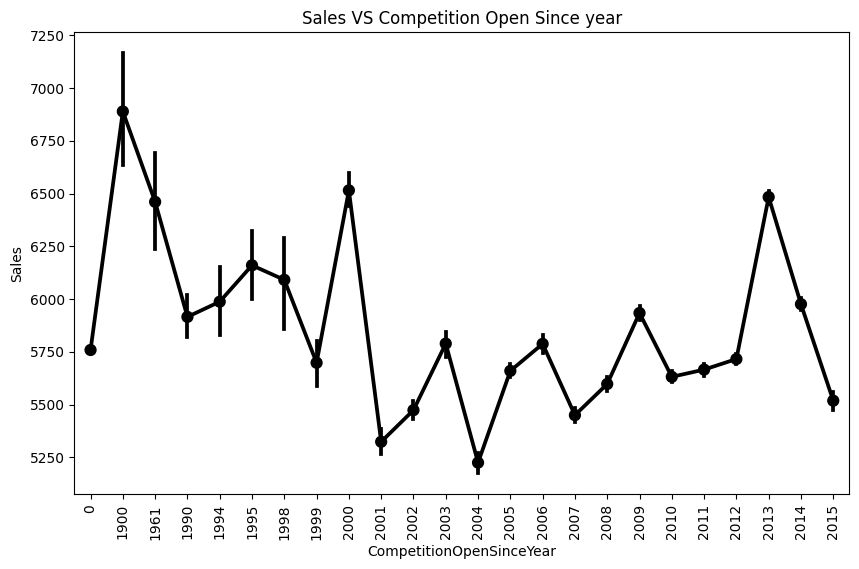

In [ ]:
plt.figure(figsize=(10,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final_df,color='black')
plt.xticks(rotation = 90)
sns.set_style=("dark")
plt.title('Sales VS Competition Open Since year')
plt.show()

From this chart we get insights that Sales is Highest During the Year 1900 because for that time there are limited number of Stores ,hence the competition is very low. But as year pass,no of stores get increased that means Competition also increased accordignly ,hence Sales got Decline year by year.

## **Chart- #02**

Plot between sales and Promo2SinceYear using line chart

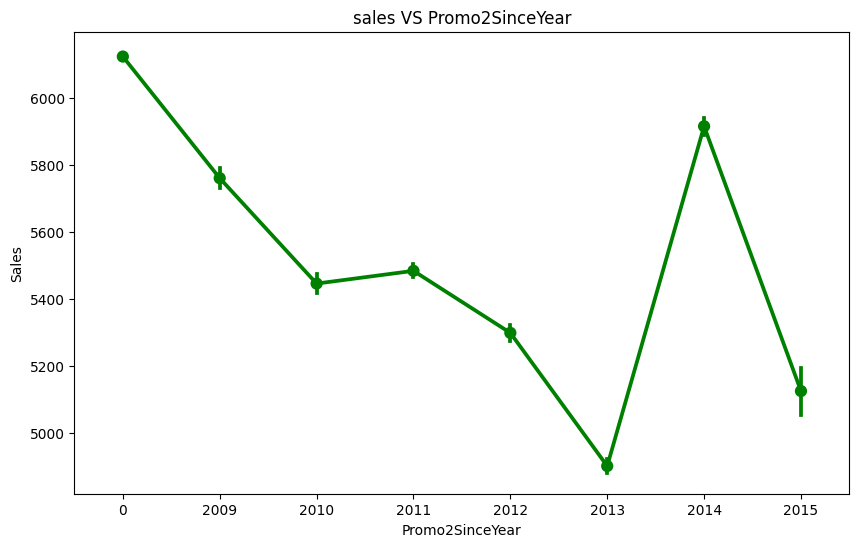

In [ ]:
plt.figure(figsize=(10,6))
sns.pointplot(x = 'Promo2SinceYear', y = 'Sales', data=final_df, color= 'green')
sns.set_style=("dark")
plt.title("sales VS Promo2SinceYear")
plt.show()

From This Graph We saw that sales of stores is effected which continues their promotion.The Sales in 2013 and 2015 are very low inspite of promotion.The reason can be more competiton year by year.

## **Chart- #03**

Plot between Sales and DayOfWeek using line chat

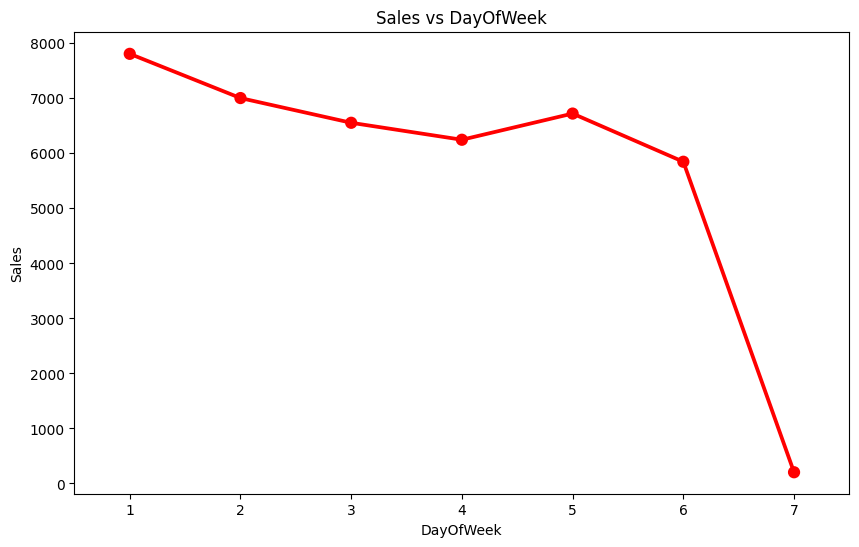

In [ ]:
plt.figure(figsize=(10,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final_df,color='Red')
sns.set_style=("dark")
plt.title('Sales vs DayOfWeek')
plt.show()


From this graph we get insights that Maximum Sales is on Day 1 which is Monday and the same is decreasing till Day 6 which is Saturday .As most of the stores are closed on Day 7 which is Sunday, so the Sales is closed to Zero.

## **Chart- #04**

 plot between sales and competitionOpenSinceMonth.

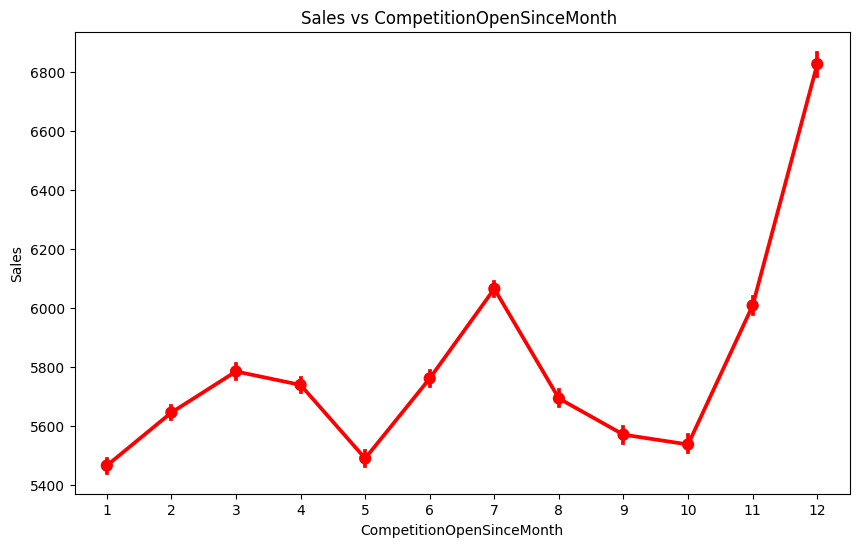

In [ ]:
plt.figure(figsize=(10,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final_df,color='Red')
sns.set_style=("dark")
plt.title('Sales vs CompetitionOpenSinceMonth ')
plt.show()

From this graph we saw maximum sales reached in end of the year.

## **Chart- #05**

Plot between StoreType and Sales using boxplot

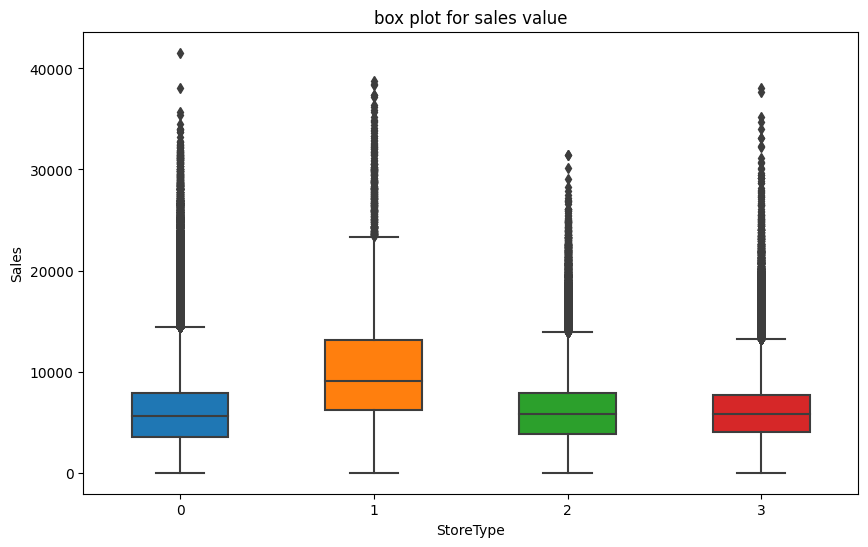

In [ ]:
plt.figure(figsize=(10,6))
plot_storetype_sales= sns.boxplot(x='StoreType', y='Sales', data=final_df, saturation=1.4, width=.5)
plt.title("box plot for sales value")
plt.show()

## **Chart- #06**

Boxplot For Sales Values on the basis of Assortment

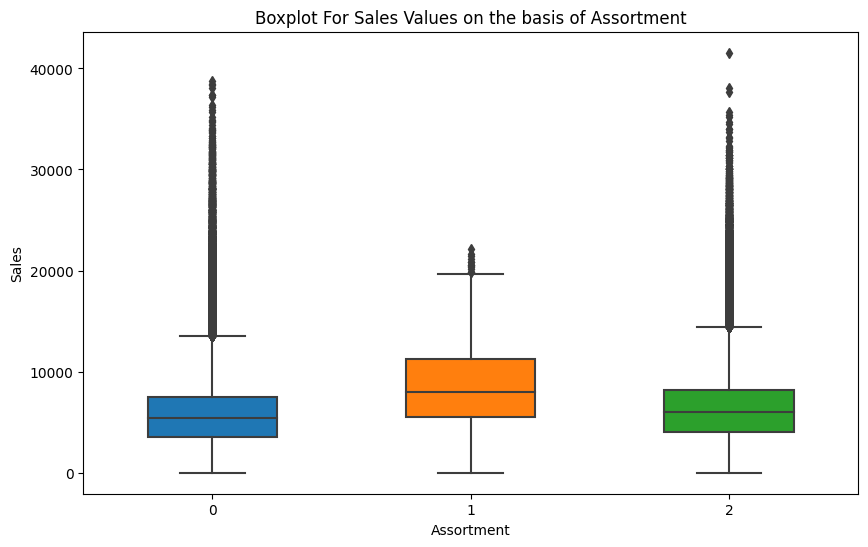

In [ ]:
plt.figure(figsize=(10,6))
plot_storetype_sales=sns.boxplot(x='Assortment', y='Sales', data=final_df, saturation=1.4, width=.5)
plt.title("Boxplot For Sales Values on the basis of Assortment")
plt.show()

## **Chart- #07**

Count plot

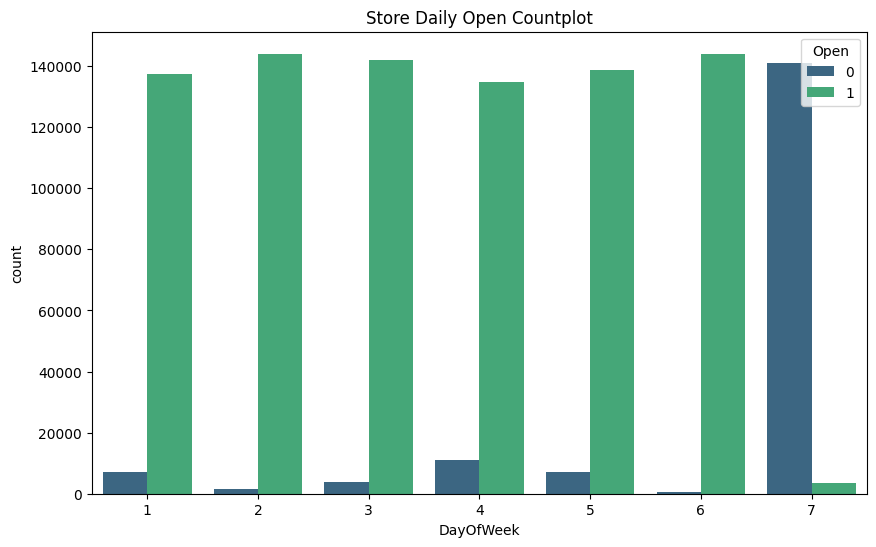

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'DayOfWeek', hue='Open', data= final_df, palette='viridis')
plt.title('Store Daily Open Countplot')
plt.show()

## **Chart- #08**

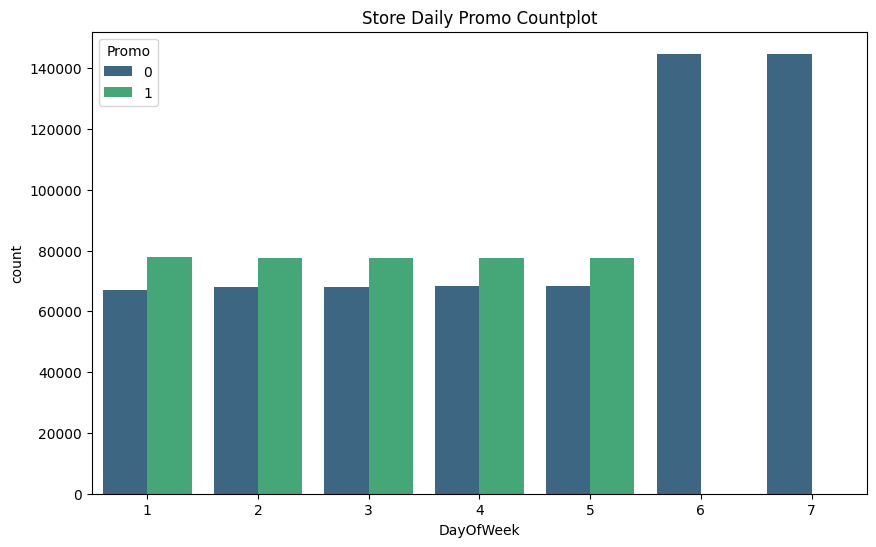

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final_df, palette='viridis')
plt.title('Store Daily Promo Countplot')
plt.show()

## **Chart- #09**

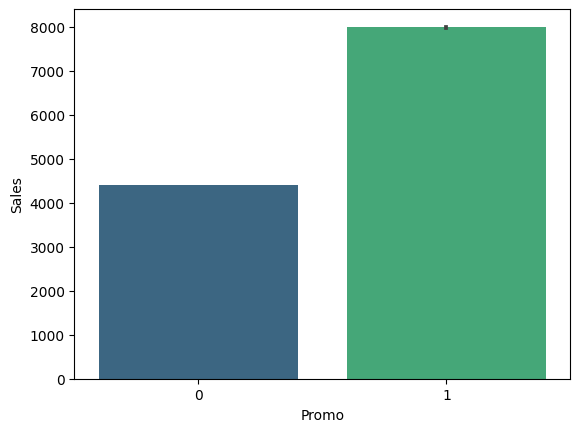

In [ ]:
plt.figure()
promo_sales = sns.barplot(x="Promo", y="Sales", data=final_df, palette='viridis')

Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.

## **Chart- #10**

 **State Holiday**

---


**0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None**

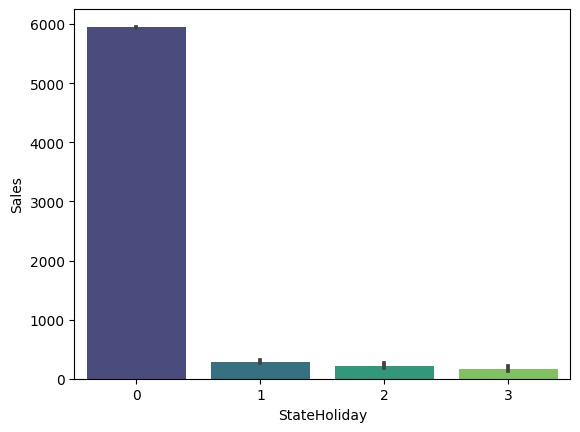

In [ ]:
plt.figure()
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final_df,palette='viridis')

## **Chart- #11**

**School Holiday**

---


**0='Not Holiday', 1='Holiday**

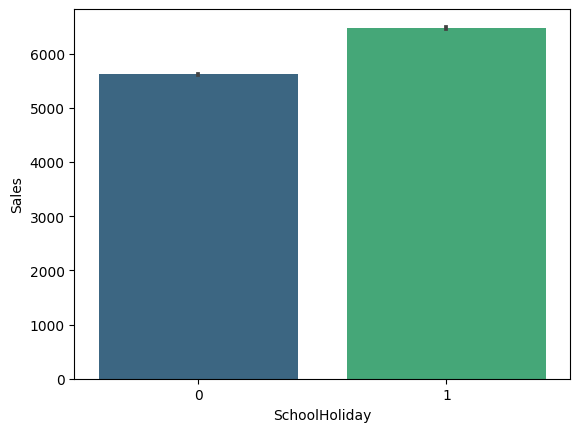

In [ ]:
plt.figure()
stateholiday_sales =sns.barplot(x="SchoolHoliday", y="Sales", data=final_df,palette='viridis')

We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

##**Conclusion From EDA:**

The analysis of plot sales and competition dynamics reveals a positive trend, with sales increasing steadily throughout the year, peaking towards the end. The correlation between the duration a plot has been open and rising sales suggests a favourable market environment.
Examining plot sales and days of the week uncovers distinct consumer behaviour patterns. Mondays stand out as the most lucrative, witnessing peak sales, while sales gradually decline through the week, reaching a minimum on Sundays. This highlights a clear fluctuation in consumer engagement over the week.

The plot between promotional activities and sales underscores the effectiveness of promotions in driving sales, showing a positive relationship. This affirms the impact of strategic marketing efforts on consumer engagement and purchases.

Store types play a crucial role in shaping opening patterns. Notably, all Type 'b' stores maintain consistent operations, contributing to their sustained success. These stores also consistently achieve higher sales, with noticeable peaks on weekends, indicating robust consumer demand.

The correlation between assortment level 'b' and store type 'b' is evident, with Assortment Level 'b' exclusively offered at Store Type 'b'. This emphasizes a tailored product offering aligned with specific store types.

An intriguing insight emerges regarding holiday impact on store operations. Most stores close during state holidays, but during school holidays, the number of open stores surpasses state holidays. This suggests a strategic alignment with school schedules to maximize business opportunities.

## **Chart- #12**

# **Feature Engineering & Data Pre-processing**

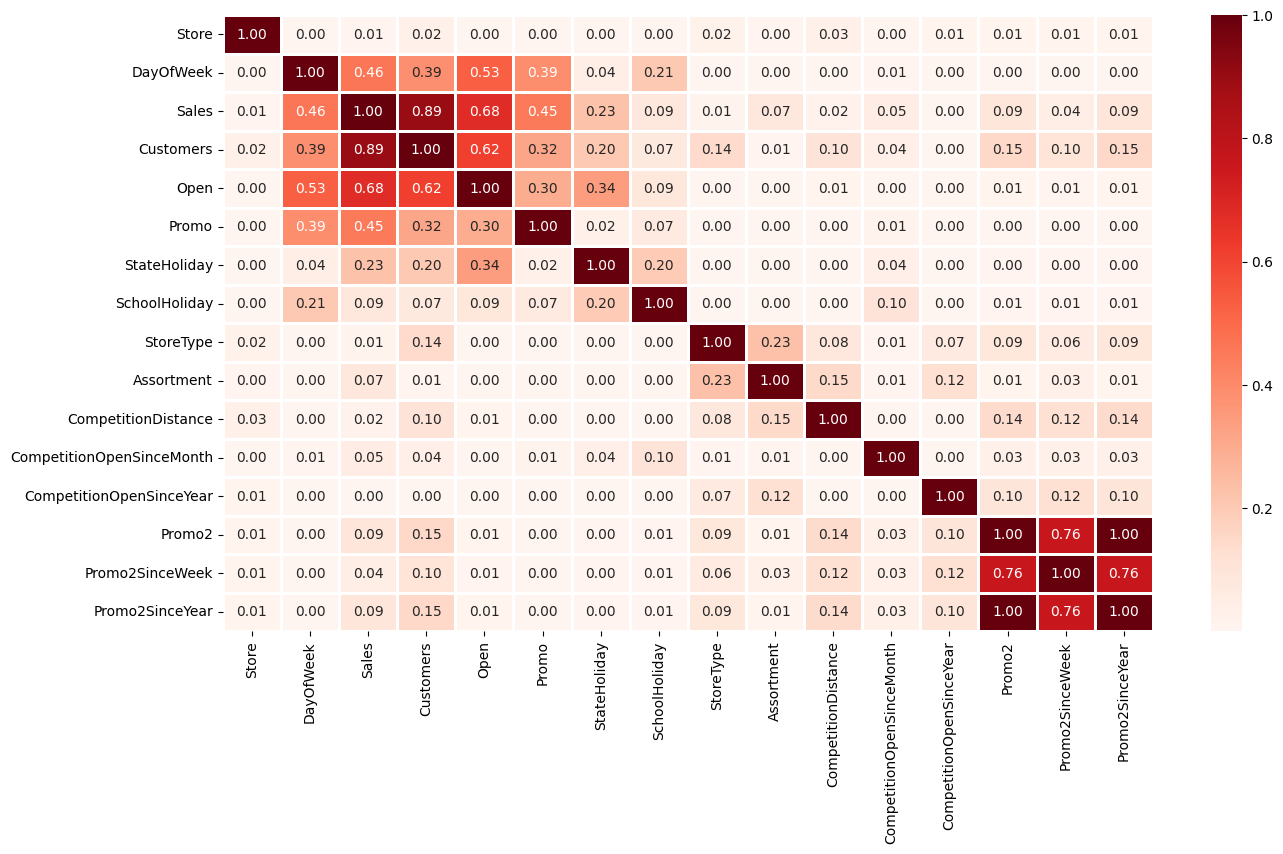

In [ ]:
plt.figure(figsize=(15,8))
correlation = final_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=1,fmt=".2f")
plt.show()

# **Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698820e+00
1,DayOfWeek,4.104634e+00
2,Customers,5.236586e+00
3,Open,9.374439e+00
4,Promo,1.917193e+00
5,StateHoliday,1.187974e+00
6,SchoolHoliday,1.330848e+00
7,StoreType,1.940267e+00
8,Assortment,2.045386e+00
9,CompetitionDistance,1.589466e+00


**In above table we can see that VIF(Variance Inflation Factor) value for column Promo2 and Promo2SinceYear is Higher .So we will drop either Promo2 or Promo2SinceYear and again check VIF value.Here we drop Promo2 column.**

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Sales','Promo2']]])

,variables,VIF
0,Store,3.696388
1,DayOfWeek,4.104282
2,Customers,5.236066
3,Open,9.373305
4,Promo,1.917150
5,StateHoliday,1.187974
6,SchoolHoliday,1.330831
7,StoreType,1.934410
8,Assortment,2.039789
9,CompetitionDistance,1.583028


VIF factor below 10 is look good for Machine Learning Model.

## **Chart- #13**

# **Analysis of Target Variable i.e 'Sales'.**

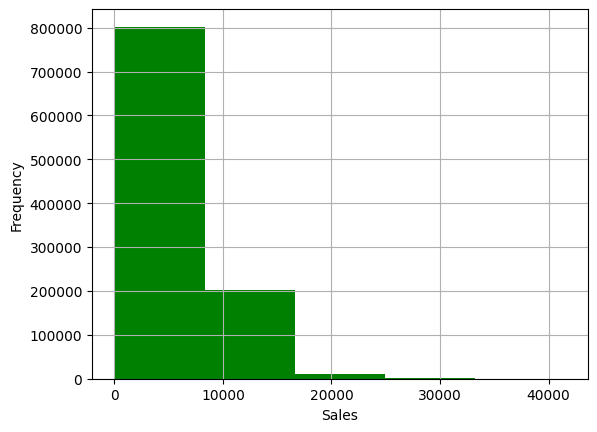

In [ ]:
final_df['Sales'].hist(bins=5, color='g')
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

When the store was not open the sales for that day is registered as 0.

In [ ]:
len(final_df[(final_df.Open == 0) & (final_df.Sales == 0)])

172817

In [ ]:
final_df = pd.get_dummies(final_df, columns= ['PromoInterval'])

In [ ]:
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


# **ML Model Implementation**

## **#01- Linear Regression**

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
#Target variable
dep_var = 'Sales'

In [ ]:
final_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [ ]:
#features
indep_var = final_df.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [ ]:
#Feature variables with values
U = final_df[indep_var].values
U

array([[  5, 555,   1, ...,   0,   0,   0],
       [  5, 625,   1, ...,   0,   1,   0],
       [  5, 821,   1, ...,   0,   1,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   1]])

In [ ]:
#Target variable with values
V = final_df[dep_var].values
V

array([5263, 6064, 8314, ...,    0,    0,    0])

In [ ]:
#train test splitting

U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(813767, 17)
(203442, 17)


In [ ]:
# scaling the x values

Scalar=StandardScaler()

U_train = Scalar.fit_transform(U_train)
U_test=Scalar.transform(U_test)

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [ ]:
linear_regression.coef_

array([-1.36021484e+02,  2.92684440e+03,  5.20779424e+02,  6.05707633e+02,
       -1.07826005e+02,  1.80817822e+01,  3.06875648e+02,  1.84803483e+02,
        1.89351256e+02,  9.08883007e+01,  6.55821353e+01,  9.39880404e+15,
        1.58307650e+02,  9.49286047e+15,  6.03880803e+13,  8.51622412e+13,
        5.53473398e+13])

In [ ]:
linear_regression.intercept_

5773.813122970143

In [ ]:
v_pred = linear_regression.predict(U_test)
v_pred

array([ 7101.66614705, 12611.33802205,  9204.59583455, ...,
        6938.9200533 ,  5999.9747408 ,  4007.9825533 ])

In [ ]:
linear_regression.score(U_train, v_train)  #R2

0.8677978490444807

In [ ]:
linear_regression.score(U_test, v_test)

0.8684236859866605

In [ ]:
# Y- actual and predicted values
regression_Dataframe = pd.DataFrame(zip(v_test,v_pred), columns = ['actual', 'predicted'])
regression_Dataframe


,actual,predicted
0,7285,7101.666147
1,6221,12611.338022
2,8132,9204.595835
3,20916,11526.502085
4,5472,6593.181772
...,...,...
203437,5650,6655.935678
203438,5464,6520.869272
203439,6191,6938.920053
203440,5663,5999.974741


In [ ]:
# calculate MSE, RMSE and r2_score
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1944268.5102740775
RMSE : 1394.370291663616
R2 : 0.8684236859866605


In [ ]:
#keeping track of the r2 score for comparison
r2_df = pd.DataFrame(columns= ['regression', 'r2_score'])
r2_df.loc[len(r2_df.index)] = ['OLS', r2]
r2_df

,regression,r2_score
0,OLS,0.868424


## **#02- Lasso Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Using gridsearch cv to check for best parameters
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)



lasso_regressor.fit(U_train, v_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -1961082.1449977283


In [ ]:
lasso_regressor = Lasso(alpha = 0.1)
lasso_regressor.fit(U_train, v_train)

Lasso(alpha=0.1)

In [ ]:
v_pred_lasso = lasso_regressor.predict(U_test)
v_pred_lasso

array([ 7097.50048159, 12610.46391849,  9196.14271016, ...,
        6937.01166492,  5999.71916519,  4001.69533029])

In [ ]:
r2 = r2_score(v_test, v_pred_lasso)
print("R2 :" ,r2)

R2 : 0.8684245402406199


In [ ]:
# Y- actual and predicted values
pd.DataFrame(zip(v_test,v_pred_lasso), columns = ['actual', 'predicted'])

,actual,predicted
0,7285,7097.500482
1,6221,12610.463918
2,8132,9196.142710
3,20916,11530.041924
4,5472,6598.527193
...,...,...
203437,5650,6658.869156
203438,5464,6523.676513
203439,6191,6937.011665
203440,5663,5999.719165


In [ ]:
#keeping track of the r2 score for comparison
r2_df.loc[len(r2_df.index)] = ['Lasso', r2]
r2_df

,regression,r2_score
0,OLS,0.868424
1,Lasso,0.868425


## **#03- Ridge Regression**

In [ ]:
#Using gridsearch cv to check for best parameters
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(U_train,v_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -1961082.557579916


In [ ]:
ridge_regressor = Ridge(alpha = 10)
ridge_regressor.fit(U_train, v_train)

Ridge(alpha=10)

In [ ]:
v_pred_ridge = ridge_regressor.predict(U_test)
v_pred_ridge

array([ 7096.93967659, 12610.64291501,  9196.48238671, ...,
        6937.43599939,  5999.43434034,  4001.93107617])

In [ ]:
r2 = r2_score(v_test, v_pred_ridge)
print("R2 :" ,r2)

R2 : 0.8684244929302682


In [ ]:
# Y- actual and predicted values
pd.DataFrame(zip(v_test,v_pred_ridge), columns = ['actual', 'predicted'])

,actual,predicted
0,7285,7096.939677
1,6221,12610.642915
2,8132,9196.482387
3,20916,11531.041111
4,5472,6598.733408
...,...,...
203437,5650,6659.291958
203438,5464,6524.063304
203439,6191,6937.435999
203440,5663,5999.434340


In [ ]:
#keeping track of the r2 score for comparison
r2_df.loc[len(r2_df.index)] = ['Ridge', r2]
r2_df

,regression,r2_score
0,OLS,0.868424
1,Lasso,0.868425
2,Ridge,0.868424


## **#04- Elastic Net Regression**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
#Using gridsearch cv to check for best parameters

elastic = ElasticNet()
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5],
              'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=3)
elastic_regressor.fit(U_train, v_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1, 'l1_ratio': 0.8}

Using  {'alpha': 0.1, 'l1_ratio': 0.8}  the negative mean squared error is:  -1965931.5744412465


In [ ]:
#fitting elastic net model with alpha value of 0.1 and l1_ratio=0.8
elastic_regressor = ElasticNet(alpha = 0.1,l1_ratio=0.8)
elastic_regressor.fit(U_train, v_train)

ElasticNet(alpha=0.1, l1_ratio=0.8)

In [ ]:
v_pred_elasticnet = elastic_regressor.predict(U_test)
v_pred_elasticnet

array([ 7057.59448608, 12474.506589  ,  9115.51658104, ...,
        6883.49530961,  6034.66775183,  4032.70598014])

In [ ]:
r2 = r2_score(v_test, v_pred_elasticnet)
print("R2 :" ,r2)

R2 : 0.8680095330217291


In [ ]:
# Y- actual and predicted values
pd.DataFrame(zip(v_test,v_pred_elasticnet), columns = ['actual', 'predicted'])

,actual,predicted
0,7285,7057.594486
1,6221,12474.506589
2,8132,9115.516581
3,20916,11412.478035
4,5472,6640.721725
...,...,...
203437,5650,6675.222823
203438,5464,6585.112553
203439,6191,6883.495310
203440,5663,6034.667752


In [ ]:
#keeping track of the r2 score for comparison
r2_df.loc[len(r2_df.index)] = ['Elastic Net', r2]
r2_df

,regression,r2_score
0,OLS,0.868424
1,Lasso,0.868425
2,Ridge,0.868424
3,Elastic Net,0.868010


## **#05- Decision Tree Regression**

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)



v_pred_dt = decision_tree.predict(U_test)
v_pred_dt


array([ 6405.43709768, 10731.77550641,  9096.41109589, ...,
        8169.46322244,  6405.43709768,  2906.97914184])

In [ ]:
r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

R2 : 0.8687939610732938


In [ ]:
# Y- actual and predicted values
pd.DataFrame(zip(v_test,v_pred_dt), columns = ['actual', 'predicted'])

,actual,predicted
0,7285,6405.437098
1,6221,10731.775506
2,8132,9096.411096
3,20916,11835.110635
4,5472,5476.684725
...,...,...
203437,5650,5476.684725
203438,5464,5476.684725
203439,6191,8169.463222
203440,5663,6405.437098


In [ ]:
#keeping track of the r2 score for comparison
r2_df.loc[len(r2_df.index)] = ['Decision Tree', r2]
r2_df

,regression,r2_score
0,OLS,0.868424
1,Lasso,0.868425
2,Ridge,0.868424
3,Elastic Net,0.868010
4,Decision Tree,0.868794


## **#06- Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(U_train, v_train)

# Make predictions on the test data
v_pred_rf = random_forest.predict(U_test)


In [ ]:
# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(v_test, v_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)


# Calculate the coefficient of determination (R2 score)
r2 = r2_score(v_test, v_pred_rf)
print("R2:", r2)

MSE: 1121740.015753417
RMSE: 1059.1222855522478
R2: 0.9240874314560111


In [ ]:
# Y- actual and predicted values
pd.DataFrame(zip(v_test,v_pred_rf), columns = ['actual', 'predicted'])

,actual,predicted
0,7285,6947.633434
1,6221,10847.496664
2,8132,9256.438159
3,20916,13548.337806
4,5472,6057.932269
...,...,...
203437,5650,6457.348941
203438,5464,5291.245767
203439,6191,7505.354128
203440,5663,6136.289895


In [ ]:
#keeping track of the r2 score for comparison
r2_df.loc[len(r2_df.index)] = ['Random Forest', r2]
r2_df

,regression,r2_score
0,OLS,0.868424
1,Lasso,0.868425
2,Ridge,0.868424
3,Elastic Net,0.868010
4,Decision Tree,0.868794
5,Random Forest,0.924087


## **Chart- #14**

Tally of R2 scores of different models.

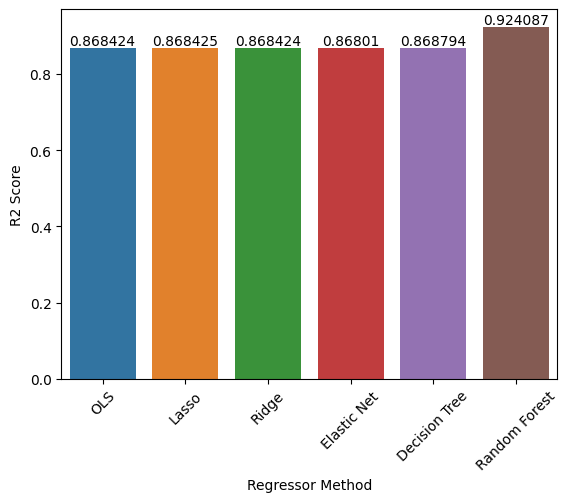

In [ ]:
#Plotting r2 values from different models for better comparison

import seaborn as sns
ax = sns.barplot(x= r2_df.regression, y= r2_df.r2_score)
plt.xlabel("Regressor Method")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()


In contrast to its counterparts, the Random Forest algorithm stands out as the standout performer, showcasing its superiority with an impressive 92% accuracy in forecasting Rossmann store sales. Outshining competing algorithms, Random Forest demonstrates its robust predictive capabilities, making it a top choice for accurate and reliable sales predictions in the retail domain.

###**Conclusion and Future Work:**

In conclusion, our regression analysis paints a vivid picture of Rossmann store sales prediction. We highlight key findings, discuss algorithmic strengths and limitations, and propose avenues for future enhancement. This journey not only offers insights into the dynamics of retail sales but also sets the stage for further exploration and refinement of predictive models.

###**Visualizations:**

 Accompanying our analyses are insightful visualizations that bridge the gap between data and interpretation. These visual aids provide a clear understanding of how our models align with actual sales figures, offering a visual narrative of predictive accuracy.

In summary, this notebook serves as a roadmap for predicting Rossmann store sales, blending statistical rigor with practical insights, and paving the way for future advancements in the realm of retail analytics.


---

<center><font size="+4"> ************</font></center>

---
